In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/AI_Framework

/content/drive/MyDrive/AI_Framework


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# interactions_test = pd.read_csv("data/interactions_test.csv")
# interactions_train = pd.read_csv("data/interactions_train.csv")
# raw_interactions = pd.read_csv("data/RAW_interactions.csv")
raw_recipes = pd.read_csv("data/RAW_recipes.csv")

Recommendations :

- popularité
- étapes de la recette (steps)
- description de la recette

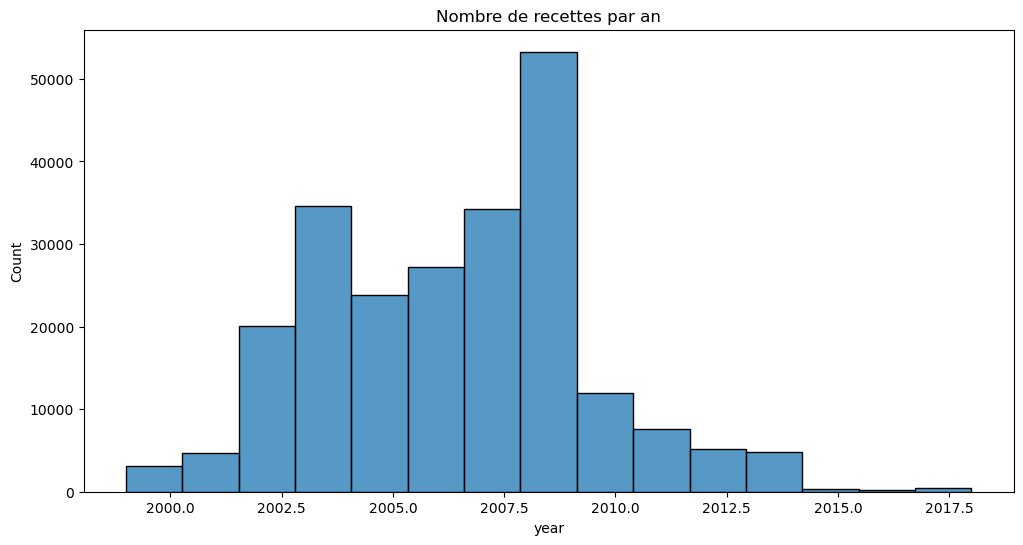

In [3]:
raw_recipes["year"] = raw_recipes["submitted"].str.split("-", expand = True)[0]
raw_recipes["year"] = raw_recipes["year"].fillna(-1).astype(int).replace(-1, np.nan)

plt.figure(figsize=(12,6))
sns.histplot(data=raw_recipes, x="year", bins = 15)
plt.title("Nombre de recettes par an")
plt.show()

In [4]:
import random
random.seed(1)
subset = raw_recipes.iloc[random.sample(range(raw_recipes.shape[0]), k= 30000, ),:].reset_index(drop=True)

In [5]:
del(raw_recipes)

# Recommendation par les étapes de la recette :

In [6]:
subset["all_steps"] = subset["steps"].apply(lambda x : ' '.join(eval(x)))
subset["all_steps"]

0        1) after your coffee has brewed , combine the ...
1        in a blender , combine the peaches , milk , or...
2        pre-heat oven to 350 degrees in a large , heav...
3        combine the flour , salt , hot water and short...
4        put chicken and cream cheese in a pot on stove...
                               ...                        
29995    halve the peppers , remove the ribs and seeds ...
29996    preheat oven to 400 degrees mix all of the ing...
29997    place chicken in a resealable plastic bag set ...
29998    preheat oven to 350 degrees f heat half the bu...
29999    preheat oven to 350 degrees fahrenheit with a ...
Name: all_steps, Length: 30000, dtype: object

In [7]:
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
# Download stopwords list
stop_words = set(stopwords.words('english'))

# Interface lemma tokenizer from nltk with sklearn
class StemTokenizer:
    ignore_tokens = [',', '.', ';', ':', '"', '``', "''", '`']
    def __init__(self):
        self.stemmer = SnowballStemmer('english')
    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc) if t not in self.ignore_tokens]

tokenizer=StemTokenizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
s = subset['all_steps'][0]
print(s)
print(tokenizer(s))

1) after your coffee has brewed , combine the sugar & milk and heat it in your microwave for 2 minutes at the highest setting 2) next , whip the heated milk / sugar mix in your blender for about one minute until it's a fluffy foam 3) fill your cup two thirds full with the coffee and top it off with your heated froth
['1', ')', 'after', 'your', 'coffe', 'has', 'brew', 'combin', 'the', 'sugar', '&', 'milk', 'and', 'heat', 'it', 'in', 'your', 'microwav', 'for', '2', 'minut', 'at', 'the', 'highest', 'set', '2', ')', 'next', 'whip', 'the', 'heat', 'milk', '/', 'sugar', 'mix', 'in', 'your', 'blender', 'for', 'about', 'one', 'minut', 'until', 'it', "'s", 'a', 'fluffi', 'foam', '3', ')', 'fill', 'your', 'cup', 'two', 'third', 'full', 'with', 'the', 'coffe', 'and', 'top', 'it', 'off', 'with', 'your', 'heat', 'froth']


In [8]:
# Lemmatize the stop words
from sklearn.feature_extraction.text import TfidfVectorizer
token_stop = tokenizer(' '.join(stop_words))

tfidf = TfidfVectorizer(stop_words=token_stop, max_features=4000)
tfidf_matrix = tfidf.fit_transform(subset["all_steps"])

# from sklearn.metrics.pairwise import cosine_distances
# cosine_sim = cosine_distances(tfidf_matrix)

# np.save("cosine_sim.npy", cosine_sim)
# cosine_sim = np.load("cosine_sim.npy")

In [9]:
tfidf_matrix

<30000x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 1373601 stored elements in Compressed Sparse Row format>

In [11]:
subset["name"].head(20)

0      cappuccino recipe without an expensive machine
1                              orange peach smoothies
2                             vegetarian kenyan curry
3          tgi friday s pot stickers w  dipping sauce
4                  stove top buffalo chicken wing dip
5                        banana date walnut breakfast
6     croissant   salmon  or ham  breakfast casserole
7                              bubbly cranberry punch
8                                   maple baked beets
9                                     steamed mussels
10                       king prawns in swahili sauce
11                 light salad dressing with shallots
12                  raspberry cheesecake cookie pizza
13                           grilled pork   pineapple
14               sweet ramadan dumplings   lokmit ady
15                            cleaning a cuttingboard
16                                    black margarita
17                            macadamia maple granola
18                          

In [6]:
def get_reco(title, sim_matrix):
  idx = indices[title]
  print(f'original: {title}')
  recos = sim_matrix[idx].argsort()[1:6]
  recos = titles.iloc[recos]
  print(recos)

In [12]:
titles = subset['name']
indices = pd.Series(subset.index, index=subset['name'])

title = "vegetarian kenyan curry"
get_reco(title, cosine_sim)

print()
title = "croissant   salmon  or ham  breakfast casserole"
get_reco(title, cosine_sim)

print()
title = "apple walnut pancakes"
get_reco(title, cosine_sim)

original: vegetarian kenyan curry
28161                 chickpea and potato curry
28831                     cheesy bratwurst stew
13299    vindaloo  goan style hot and sour pork
22205    chickpea spinach curry over brown rice
12581                             lentil sambar
Name: name, dtype: object

original: croissant   salmon  or ham  breakfast casserole
16948                savory asparagus croissants
10737                            eggs a la russe
20620                    brandied peaches   yams
19074                        british brunch bake
27925    chocolate chunk croissant bread pudding
Name: name, dtype: object

original: apple walnut pancakes
4689           polish apple pancakes
27944             pancakes on the go
17679       family favorite pancakes
19545      sour cream apple pancakes
1326     melt in your mouth pancakes
Name: name, dtype: object


In [20]:
title = "vegetarian kenyan curry"
s = subset.loc[subset["name"] == title, "all_steps"].values[0]
print(s)
print(tokenizer(s))

title = "chickpea and potato curry"
s = subset.loc[subset["name"] == title, "all_steps"].values[0]
print(s)
print(tokenizer(s))

pre-heat oven to 350 degrees in a large , heavy skillet or pot , brown the onions in moderately hot oil along with the cumin seeds and mustard seeds watch out for popping mustard seeds ! add the potato pieces , and stir to coat each piece with the spices now add the remaining spices and continue to stir for several minutes thin the tomato paste with about 2 / 3 cup of water stir into the pot add vegetables , one at a time , cooking for a minute or so between each addition , and put in the chickpeas last you may opt to put the leafy greens in now or just before serving if your pot is not oven proof , transfer mixture to one that is cover with a lid or seal with foil and bake for about 45 minutes , checking after the first 20 minutes the consistency should be rather thick , but add liquid if necessary to prevent burning stir occasionally to prevent sticking you'll want to fish out the cloves and the cinnamon sticks before serving over rice or with flat bread like roti or naan
['pre-heat'

In [17]:
title = "vegetarian kenyan curry"
print("\nSteps to cook ", title, " : ")

i = 1
for step in eval(subset.loc[subset["name"] == title, "steps"].values[0]) :
  print("       step", i, ":", step)
  i+=1


title = "chickpea and potato curry"
i=1
print("\nSteps to cook ", title, " : ")
for step in eval(subset.loc[subset["name"] == title, "steps"].values[0]) :
  print("       step", i, ":", step)
  i+=1


Steps to cook  vegetarian kenyan curry  : 
       step 1 : pre-heat oven to 350 degrees
       step 2 : in a large , heavy skillet or pot , brown the onions in moderately hot oil along with the cumin seeds and mustard seeds
       step 3 : watch out for popping mustard seeds !
       step 4 : add the potato pieces , and stir to coat each piece with the spices
       step 5 : now add the remaining spices and continue to stir for several minutes
       step 6 : thin the tomato paste with about 2 / 3 cup of water
       step 7 : stir into the pot
       step 8 : add vegetables , one at a time , cooking for a minute or so between each addition , and put in the chickpeas last
       step 9 : you may opt to put the leafy greens in now or just before serving
       step 10 : if your pot is not oven proof , transfer mixture to one that is
       step 11 : cover with a lid or seal with foil and bake for about 45 minutes , checking after the first 20 minutes
       step 12 : the consistency sho

In [18]:
del(cosine_sim)

In [21]:
title = "apple walnut pancakes"
s = subset.loc[subset["name"] == title, "all_steps"].values[0]
print(s)
print(tokenizer(s))

title = "polish apple pancakes"
s = subset.loc[subset["name"] == title, "all_steps"].values[0]
print(s)
print(tokenizer(s))

in a large bowl , combine the flours , brown sugar , baking powder and salt combine the egg whites , egg , milk and oil add to dry ingredients just until moistened fold in apple and walnuts pour batter by 1 / 4 cupfuls onto a hot griddle coated with cooking spray turn when bubbles form on top cook until the second side is golden brown serve with syrup
['in', 'a', 'larg', 'bowl', 'combin', 'the', 'flour', 'brown', 'sugar', 'bake', 'powder', 'and', 'salt', 'combin', 'the', 'egg', 'white', 'egg', 'milk', 'and', 'oil', 'add', 'to', 'dri', 'ingredi', 'just', 'until', 'moisten', 'fold', 'in', 'appl', 'and', 'walnut', 'pour', 'batter', 'by', '1', '/', '4', 'cup', 'onto', 'a', 'hot', 'griddl', 'coat', 'with', 'cook', 'spray', 'turn', 'when', 'bubbl', 'form', 'on', 'top', 'cook', 'until', 'the', 'second', 'side', 'is', 'golden', 'brown', 'serv', 'with', 'syrup']
in a a bowl , combine flour , sugar , salt and spice in another bowl , lightly beat egg add milk and oil add to dry ingredients and st

In [12]:
title = "apple walnut pancakes"
print("\nSteps to cook ", title, " : ")
i = 1
for step in eval(subset.loc[subset["name"] == title, "steps"].values[0]) :
  print("       step", i, ":", step)
  i+=1

title = "polish apple pancakes"
print("\nSteps to cook ", title, " : ")
i = 1
for step in eval(subset.loc[subset["name"] == title, "steps"].values[0]) :
  print("       step", i, ":", step)
  i+=1


Steps to cook  apple walnut pancakes  : 
       step 1 : in a large bowl , combine the flours , brown sugar , baking powder and salt
       step 2 : combine the egg whites , egg , milk and oil
       step 3 : add to dry ingredients just until moistened
       step 4 : fold in apple and walnuts
       step 5 : pour batter by 1 / 4 cupfuls onto a hot griddle coated with cooking spray
       step 6 : turn when bubbles form on top
       step 7 : cook until the second side is golden brown
       step 8 : serve with syrup

Steps to cook  polish apple pancakes  : 
       step 1 : in a a bowl , combine flour , sugar , salt and spice
       step 2 : in another bowl , lightly beat egg
       step 3 : add milk and oil
       step 4 : add to dry ingredients and stir until smooth
       step 5 : fold in apples
       step 6 : pour batter by 1 / 2 cupfuls onto a lightly greased hot griddle and spread to form 5 inch circles
       step 7 : turn when bubbles form
       step 8 : cook the second side

# recommendation sur les descriptions

In [7]:
raw_recipes = pd.read_csv("data/RAW_recipes.csv")
raw_recipes = raw_recipes.loc[~raw_recipes["description"].isna()]
print(raw_recipes.shape)

(226658, 12)


In [9]:
print("Exemple d'une description : ", raw_recipes["description"].values[0])

Exemple d'une description :  autumn is my favorite time of year to cook! this recipe 
can be prepared either spicy or sweet, your choice!
two of my posted mexican-inspired seasoning mix recipes are offered as suggestions.


In [10]:
import random
random.seed(1)
subset = raw_recipes.iloc[random.sample(range(raw_recipes.shape[0]), k= 40000),:].\
            reset_index(drop=True)
del(raw_recipes)

titles = subset['name']
indices = pd.Series(subset.index, index=subset['name'])

In [11]:
subset["name"].head(20)

0                                   cardamom applesauce
1                               papeete tahitian prawns
2     whole wheat peanut butter banana bread with ch...
3                tomato lemon chicken breasts with sage
4                                 supreme sausage rolls
5                        banana raisin oatmeal pancakes
6                                 curried indian shrimp
7                            buss up shut  paratha roti
8     medallions of beef tenderloin with cabernet re...
9                          super creamy pumpkin pudding
10                        leek and pear english rarebit
11                                  low fat potato soup
12                           roast beef with vegetables
13                        ham  cheese and herb baguette
14                               the best brownies ever
15    coffee rubbed grilled porterhouse w  garlic or...
16                                          blood gravy
17               marinated cheese with peppers  

In [12]:
# Lemmatize the stop words
from sklearn.feature_extraction.text import TfidfVectorizer
token_stop = tokenizer(' '.join(stop_words))

tfidf = TfidfVectorizer(stop_words=token_stop, max_features=4000)
tfidf_matrix = tfidf.fit_transform(subset["description"])

from sklearn.metrics.pairwise import cosine_distances
cosine_sim = cosine_distances(tfidf_matrix)

In [17]:
title = "curried indian shrimp"
get_reco(title, cosine_sim)

print()
title = "ham  cheese and herb baguette"
get_reco(title, cosine_sim)

print()
title = "banana raisin oatmeal pancakes"
get_reco(title, cosine_sim)

original: curried indian shrimp
16346         plantains in coconut milk
32431               fragrant rice pilaf
1771               curry massalla gravy
26194    cumin  mint   coriander yogurt
19799      chaat pata aloo  potato dish
Name: name, dtype: object

original: ham  cheese and herb baguette
31710                              quick beer bread
5781            classic french bread for breadmaker
15319                    family time vegetable soup
35393    savory garbanzo bean  meat  loaf  chickpea
927                           easy soft breadsticks
Name: name, dtype: object

original: banana raisin oatmeal pancakes
22499        sophisticated southern buttermilk ice cream
33600                                farm stand brownies
30446    caramelized pears with dulce de leche ice cream
26770       five spice spareribs with hoisin honey glaze
32162                         jamaican jerk potato salad
Name: name, dtype: object


In [19]:
title = "curried indian shrimp"
print("\nDescription of ", title, " : ")
print(subset.loc[subset["name"] == title, "description"].values[0])

title = "plantains in coconut milk"
print("\nDescription of the recommendation : ", title, " : ")
print(subset.loc[subset["name"] == title, "description"].values[0])


Description of  curried indian shrimp  : 
i love curries, this one turns out nicely.

Description of the recommendation :  plantains in coconut milk  : 
this is from kenya.  it could be for dessert or try with curries or fish.


In [20]:
title = "ham  cheese and herb baguette"
print("\nDescription of ", title, " : ")
print(subset.loc[subset["name"] == title, "description"].values[0])

title = "quick beer bread"
print("\nDescription of the recommendation : ", title, " : ")
print(subset.loc[subset["name"] == title, "description"].values[0])


Description of  ham  cheese and herb baguette  : 
this french style loaf can be made from start to finish in a little over an hour.  it's a hearty loaf that is delicious sliced and lightly toasted and served with soups, stews, and salads

Description of the recommendation :  quick beer bread  : 
this recipe makes up quick as a wink and is very moist. it's great sliced and toasted or served pipping hot  with soups and salads. enjoy.


In [21]:
title = "banana raisin oatmeal pancakes"
print("\nDescription of ", title, " : ")
print(subset.loc[subset["name"] == title, "description"].values[0])

title = "sophisticated southern buttermilk ice cream"
print("\nDescription of the recommendation : ", title, " : ")
print(subset.loc[subset["name"] == title, "description"].values[0])


Description of  banana raisin oatmeal pancakes  : 
these are great with maple syrup, honey, marmalade, or even cottage cheese! packed with wholesome fruity flavor. recipe is from bon appetit's february 2004 issue.

Description of the recommendation :  sophisticated southern buttermilk ice cream  : 
bon appetit, february 1994.


In [22]:
del(cosine_sim)